In [46]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [47]:
df = pd.read_csv('./data/Usecase3_Dataset.csv')
df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [48]:
for col in df.columns:
    print(col, len(df[col].unique()))

airline_sentiment 3
airline 6
text 14427


In [49]:
df.shape

(14640, 3)

In [50]:
df.isna().sum()

airline_sentiment    0
airline              0
text                 0
dtype: int64

In [51]:
# There are duplicates in the text column; 
# Lets check if the duplicates are having silimar values in other 2 columns

In [52]:
df_1 = df.drop_duplicates()
df_1.shape

(14452, 3)

In [53]:
for col in df_1.columns:
    print(col, len(df_1[col].unique()))

airline_sentiment 3
airline 6
text 14427


In [54]:
# Lets check the duplicates 

In [55]:
df_dup = pd.concat(g for _, g in df_1.groupby("text") if len(g) > 1)

In [56]:
df_dup.shape

(50, 3)

In [57]:
df_dup

,airline_sentiment,airline,text
11962,neutral,American,@AmericanAir - keeping AA up in the Air! My cr...
12123,positive,American,@AmericanAir - keeping AA up in the Air! My cr...
11969,neutral,American,@AmericanAir @Clarkey_19 we done it with 1 tru...
12130,positive,American,@AmericanAir @Clarkey_19 we done it with 1 tru...
11939,positive,American,@AmericanAir @RobertDwyer AA doesnt charge any...
12100,neutral,American,@AmericanAir @RobertDwyer AA doesnt charge any...
11886,positive,American,"@AmericanAir Believe me, I understand. Flight ..."
12047,negative,American,"@AmericanAir Believe me, I understand. Flight ..."
11919,positive,American,@AmericanAir I don't think you should help him...
12080,neutral,American,@AmericanAir I don't think you should help him...


In [58]:
# It appears that there are 25 comments that have duplicates and these are after drop duplicates.
# lets apply the above transformation on original data and check for duplicates. 
# I am thinking of using maximum scoring of airline_sentiment column too keep a single text and drop other

In [59]:
df_ori_dup = pd.concat(g for _, g in df.groupby("text") if len(g) > 2)
df_ori_dup.shape

(56, 3)

In [60]:
df_ori_dup

,airline_sentiment,airline,text
11895,positive,American,@AmericanAir thank you!
12056,positive,American,@AmericanAir thank you!
13442,positive,American,@AmericanAir thank you!
13552,positive,American,@AmericanAir thank you!
11903,positive,American,@AmericanAir thanks
12064,positive,American,@AmericanAir thanks
12688,positive,American,@AmericanAir thanks
13029,positive,American,@AmericanAir thanks
13766,positive,American,@AmericanAir thanks
11995,neutral,American,@AmericanAir thanks!


In [61]:
# here after observing the above 2 duplicates; I will drop duplicates with keep first strategy,
# as it appears first airline_sentiment is correct for the text

In [62]:
df_use = df.drop_duplicates(subset=['text'],keep='first')
df_use.shape

(14427, 3)

In [63]:
for col in df_use.columns:
    print(col, len(df_use[col].unique()))

airline_sentiment 3
airline 6
text 14427


In [64]:
del df
del df_1
del df_dup
del df_ori_dup
df = df_use.copy()
del df_use

In [65]:
df.airline.value_counts()

United            3805
US Airways        2906
American          2594
Southwest         2408
Delta             2211
Virgin America     503
Name: airline, dtype: int64

In [66]:
df.airline_sentiment.value_counts()

negative    9080
neutral     3057
positive    2290
Name: airline_sentiment, dtype: int64

In [67]:
# Lets count the sentiment per airline
df.groupby(['airline', 'airline_sentiment']).size().reset_index(name='counts')

,airline,airline_sentiment,counts
0,American,negative,1864
1,American,neutral,431
2,American,positive,299
3,Delta,negative,955
4,Delta,neutral,723
5,Delta,positive,533
6,Southwest,negative,1185
7,Southwest,neutral,658
8,Southwest,positive,565
9,US Airways,negative,2262


In [68]:
# It can be observed from the data that peoples tweet about complients, problems and grievances more.

In [69]:
# Due to high bias towards negative snetiment, I will use F1 score as metric for measuring performance of model.

In [70]:
df.text.str.len().max(), df.text.str.len().min()

(186, 12)

In [71]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"did\'t", "did not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [72]:
from bs4 import BeautifulSoup
import lxml
from tqdm import tqdm

preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(df['text'].values):
    sentance = decontracted(sentance)
    sentance = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",sentance).split())  #https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression
    sentance = re.sub(r"http\S+", "", sentance)   # remove urls from text python: https://stackoverflow.com/a/40823105/4084039
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    preprocessed_reviews.append(sentance.strip())


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 14427/14427 [00:11<00:00, 1252.57it/s]


In [73]:
df['preprocessed_text'] = preprocessed_reviews

In [74]:
df['sentiment'] = df['airline_sentiment'].apply(lambda x: 2 if x =='positive' else x)
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x =='neutral' else x)
df['sentiment'] = df['sentiment'].apply(lambda x: 0 if x =='negative' else x)

In [75]:
df.head()

,airline_sentiment,airline,text,preprocessed_text,sentiment
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,What said,1
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,plus you have added commercials to the experie...,2
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,I did not today Must mean I need to take anoth...,1
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,it is really aggressive to blast obnoxious ent...,0
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,and it is a really big bad thing about it,0


In [76]:
df.reset_index(inplace=True, drop=True)

In [77]:
Y = df[['sentiment', 'airline']]
X = df['preprocessed_text'].values

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y) # this is random splitting
# X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train) # this is random splitting

In [78]:
X.shape, Y.shape

((14427,), (14427, 2))

In [79]:
X_train.shape, y_train.shape

((11541,), (11541, 2))

In [80]:
# y_train

In [81]:
y_train.groupby(['airline', 'sentiment']).size().reset_index(name='counts')

,airline,sentiment,counts
0,American,0,1491
1,American,1,345
2,American,2,239
3,Delta,0,764
4,Delta,1,578
5,Delta,2,426
6,Southwest,0,948
7,Southwest,1,526
8,Southwest,2,452
9,US Airways,0,1810


In [82]:
df_a = df.groupby(['airline', 'sentiment'])['sentiment'].count().unstack()
df_a

sentiment,0,1,2
airline,,,
American,1864,431,299
Delta,955,723,533
Southwest,1185,658,565
US Airways,2262,380,264
United,2633,694,478
Virgin America,181,171,151


In [83]:
y_train_a = y_train.groupby(['airline', 'sentiment'])['sentiment'].count().unstack()
y_train_a

sentiment,0,1,2
airline,,,
American,1491,345,239
Delta,764,578,426
Southwest,948,526,452
US Airways,1810,304,211
United,2106,555,383
Virgin America,145,137,121


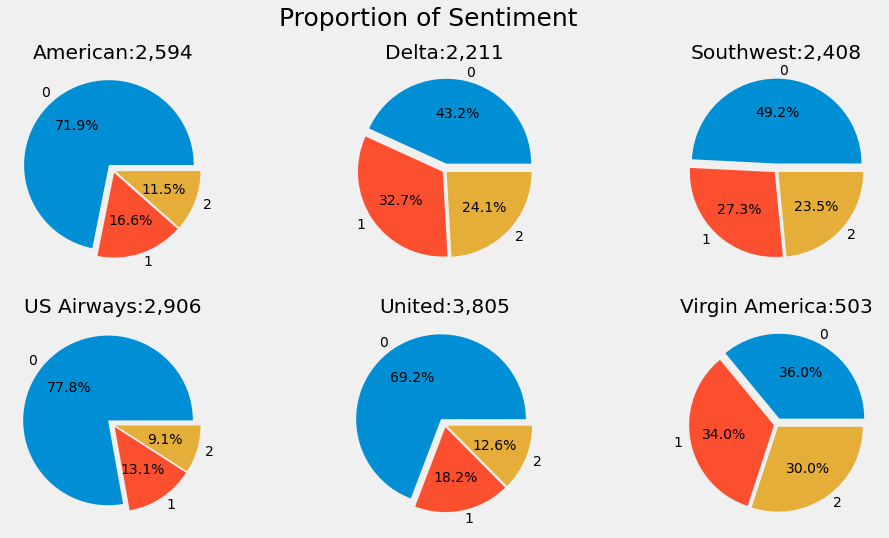

In [84]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()
for i, ax in zip(range(0, 6), axes):
    temp = df_a.iloc[i]    
    ax.pie(x = temp, labels = temp.index, autopct = '%1.1f%%', explode = [0.08, 0.03, 0.03])
    ax.set_title(f"{df_a.index[i]}:{format(df_a.values[i].sum(),',')}")

plt.suptitle("Proportion of Sentiment", fontsize = 25)    
plt.show()


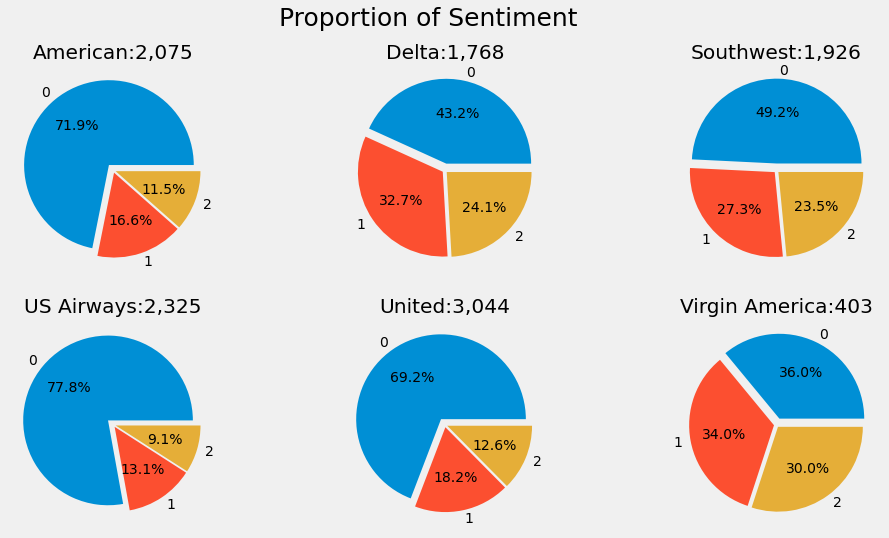

In [85]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()
for i, ax in zip(range(0, 6), axes):
    temp = y_train_a.iloc[i]    
    ax.pie(x = temp, labels = temp.index, autopct = '%1.1f%%', explode = [0.08, 0.03, 0.03])
    ax.set_title(f"{y_train_a.index[i]}:{format(y_train_a.values[i].sum(),',')}")

plt.suptitle("Proportion of Sentiment", fontsize = 25)    
plt.show()

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
count_vect.fit(X_train) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_bow = count_vect.transform(X_train)
# X_cv_bow = count_vect.transform(X_cv)
X_test_bow = count_vect.transform(X_test)

print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
# print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)

After vectorizations
(11541, 9897) (11541, 2)
(2886, 9897) (2886, 2)


In [87]:
# as the splitting is accurate as per the airline and sentiment, 
# lets keep only target variable in the y dataframes
# y_cv = y_cv['sentiment']
y_test = y_test['sentiment']
y_train = y_train['sentiment']

/Users/gopalkalpande/JestonTest/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gopalkalpande/JestonTest/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

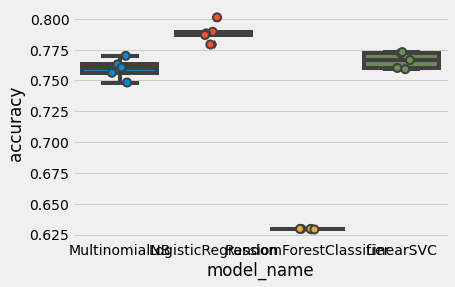

In [88]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    MultinomialNB(),
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train_bow, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [89]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.766139
LogisticRegression        0.788927
MultinomialNB             0.759553
RandomForestClassifier    0.629408
Name: accuracy, dtype: float64

/Users/gopalkalpande/JestonTest/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


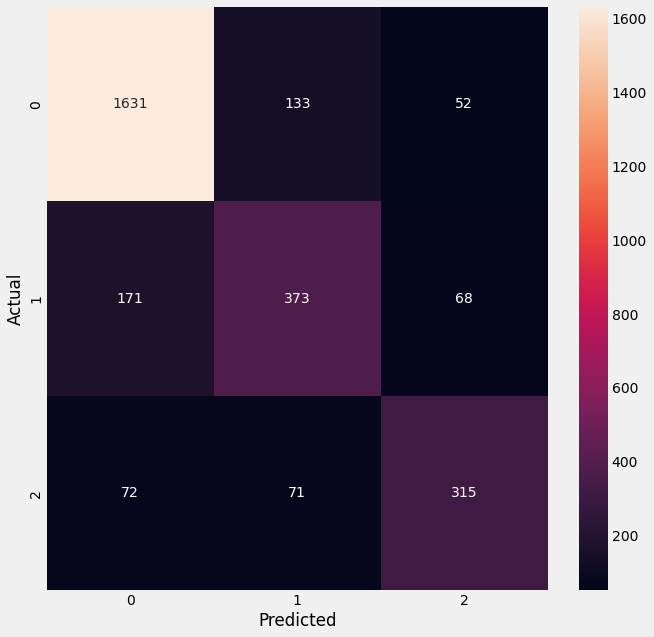

In [93]:
model = LogisticRegression(random_state=0)
model.fit(X_train_bow, y_train)
y_pred = model.predict(X_test_bow)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [94]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=['negative','neutral','positive']))

              precision    recall  f1-score   support

    negative       0.87      0.90      0.88      1816
     neutral       0.65      0.61      0.63       612
    positive       0.72      0.69      0.71       458

    accuracy                           0.80      2886
   macro avg       0.75      0.73      0.74      2886
weighted avg       0.80      0.80      0.80      2886



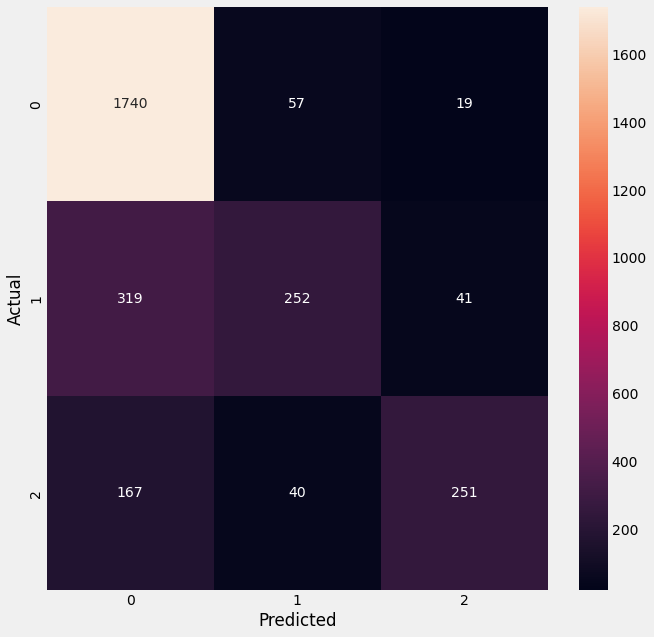

In [116]:
model_1 = MultinomialNB()
model_1.fit(X_train_bow, y_train)
y_pred = model_1.predict(X_test_bow)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [117]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=['negative','neutral','positive']))

              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      1816
     neutral       0.72      0.41      0.52       612
    positive       0.81      0.55      0.65       458

    accuracy                           0.78      2886
   macro avg       0.77      0.64      0.68      2886
weighted avg       0.77      0.78      0.76      2886



In [118]:
features = count_vect.get_feature_names_out()
df_1 = pd.DataFrame(model_1.feature_log_prob_, columns = features)
df_1 = df_1.T
positive_features = df_1[2].sort_values(ascending = False)[0:10]
negative_features = df_1[0].sort_values(ascending = False)[0:10]
neutral_features = df_1[1].sort_values(ascending = False)[0:10]

In [119]:
positive_features

the      -3.743128
to       -3.765453
you      -3.838438
for      -4.126120
thanks   -4.243189
and      -4.454624
is       -4.528732
thank    -4.548877
flight   -4.662671
on       -4.758307
Name: 2, dtype: float64

In [120]:
negative_features

to       -3.350492
the      -3.718448
is       -4.011461
not      -4.011865
flight   -4.076457
and      -4.117763
on       -4.128136
for      -4.158511
you      -4.161787
my       -4.264910
Name: 0, dtype: float64

In [121]:
neutral_features

to       -3.424778
the      -3.940765
is       -4.030013
you      -4.172679
on       -4.295778
for      -4.376436
flight   -4.392565
my       -4.562766
can      -4.650873
and      -4.704940
Name: 1, dtype: float64